###Problem Definition

Perform Best Model on the dataset and find the accuracy , Precision-Recall-Curve. I will create different machine learning models.

In [6]:
#Import requied libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import precision_recall_curve
from scikitplot.metrics import plot_roc_curve
from scikitplot.metrics import plot_precision_recall_curve
import os
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

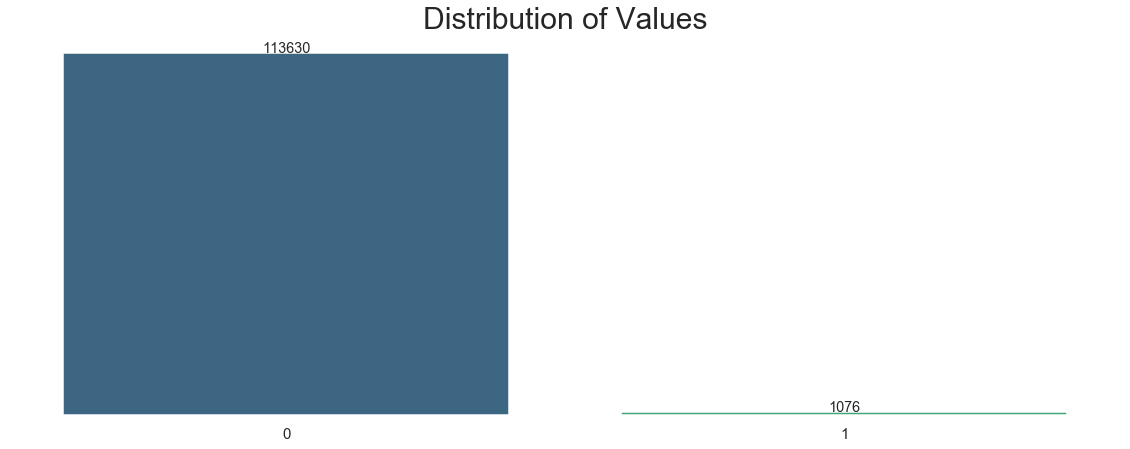

0.946933028249582

In [8]:
# setting up the figure size
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 10,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

os.chdir('D:\Projects\CustomerSuccessBox')
train = pd.read_csv('train_set.csv')
train.drop('week_start_date' , axis = 1 , inplace = True)
train.Label.value_counts()

fig, ax = plt.subplots()
g = sns.countplot(train.Label, palette='viridis')
g.set_xticklabels(['0', '1'])
g.set_yticklabels([])




# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Values', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

(len(train.loc[train.Label==1])) / (len(train.loc[train.Label == 0])) * 100



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Num Features: 15
Selected Features: [ True False  True False  True  True  True  True  True  True  True False
 False False False False  True False False False False False  True False
  True  True False  True False False  True]
Feature Ranking: [ 1 15  1  8  1  1  1  1  1  1  1  9  5  6  3 17  1  2 10 13 12 11  1  4
  1  1  7  1 14 16  1]
Unique predicted labels:  [0]
Test score:  0.9911775987725355
Recall of    RFC: 0.5217391304347826
Precision of RFC: 0.8627450980392157
F1-score of  RFC: 0.6502463054187192


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


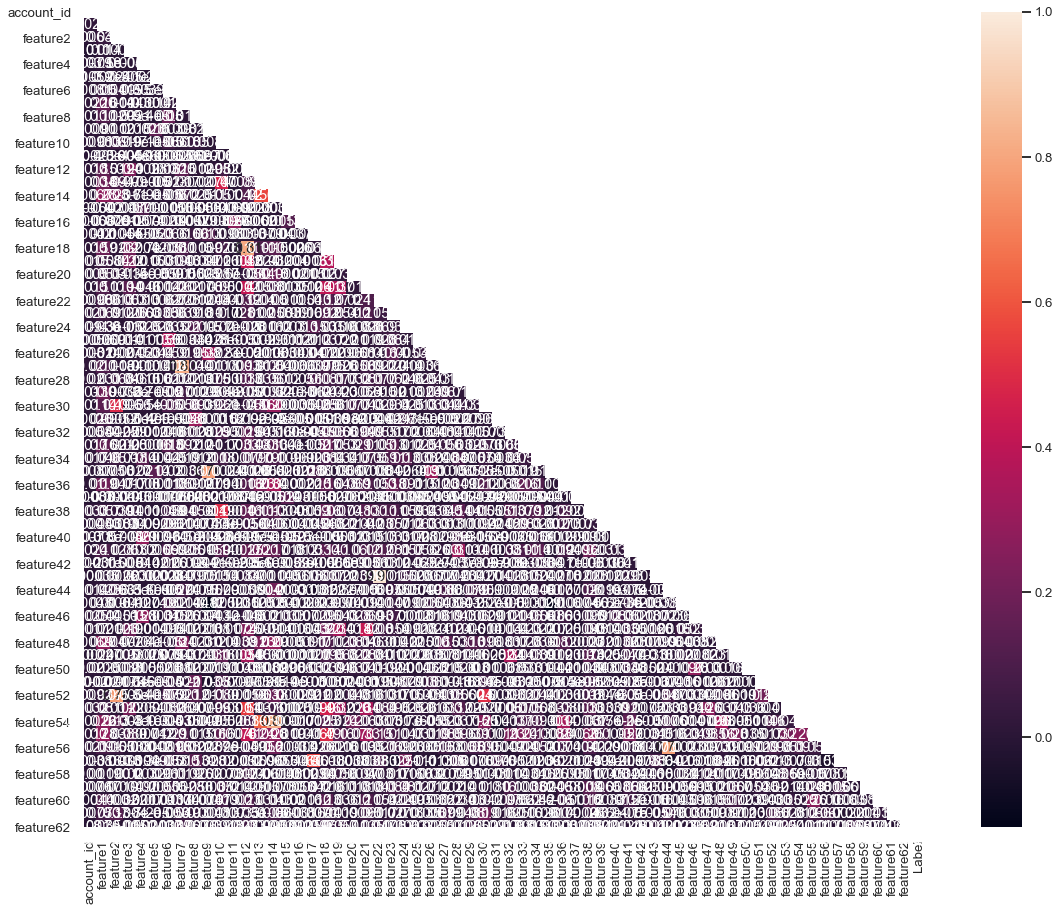

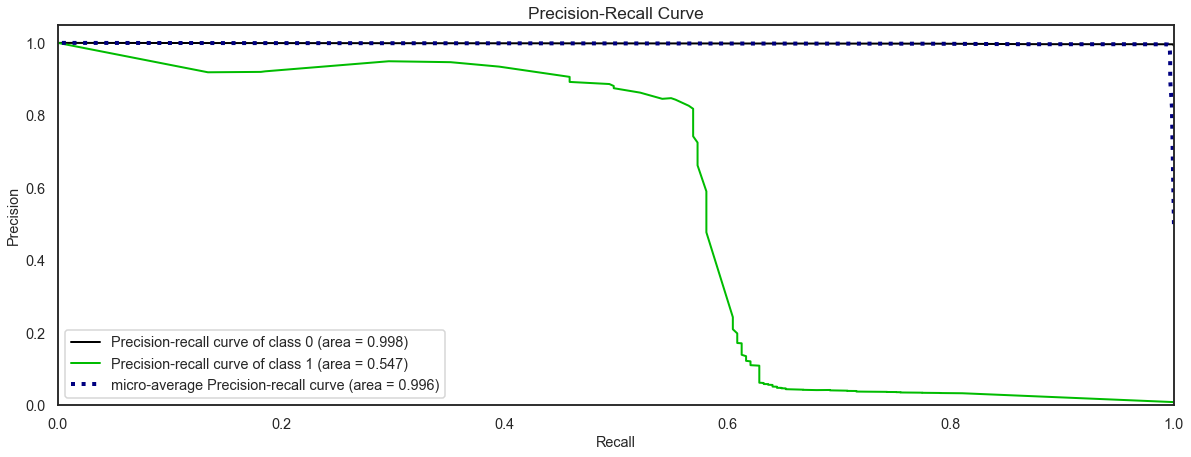

Average precision-recall score: 0.45


In [9]:
# Takes Only Relevant Features
X = train[['account_id','feature1','feature3','feature7','feature9','feature12','feature15','feature16','feature18','feature19','feature21','feature22','feature23','feature27','feature28','feature32','feature37','feature38','feature39','feature41','feature43','feature46','feature47','feature49','feature53','feature55','feature56','feature58','feature59','feature60','feature62']]
Y = train.Label

#Split the Data Set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=27)


# Select Important Features using Recurcive Feature Elimination
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X_train, Y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


# Plot Heatmap check the correlation 
plt.figure(figsize=(20,15))
matrix = np.triu(train.corr())
sns.heatmap(train.corr(),annot  = True , mask = matrix , square = True)


#Create the  Dummy Classifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(Y_test, dummy_pred))

#+===================================================================
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score , f1_score
from sklearn.metrics import average_precision_score
from scikitplot.metrics  import plot_precision_recall_curve
rfc = RandomForestClassifier(n_estimators=15).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
probas = rfc.predict_proba(X_test)

accuracy_score(Y_test , rfc_pred)
print('Recall of    RFC:',recall_score(Y_test ,rfc_pred))
print('Precision of RFC:',precision_score(Y_test , rfc_pred))
print('F1-score of  RFC:',f1_score(Y_test , rfc_pred))


skplt.metrics.plot_precision_recall_curve(Y_test, probas)
plt.show()
average_precision = average_precision_score(Y_test, rfc_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))







#matrix = np.triu(train.corr())
#sns.heatmap(train.corr(),annot  = True , mask = matrix , square = True)

